In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname='/Users/hoon/Library/Fonts/NanumSquareRegular.ttf').get_name()
plt.rc("font", family=font_name)
import matplotlib as mpl
mpl.rcParams["axes.unicode_minus"] = False

import requests as req
import time
import re

In [2]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV # 데이터 나누기, 점검 및 훈련

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_score, recall_score # 평가지표
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, StandardScaler # Feature Scaling

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import load_iris, load_boston, load_breast_cancer, make_moons, load_digits, load_diabetes, load_wine, make_blobs # 데이터
import mglearn # 그래프

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import LinearSVC

#### DecisionTree 관련
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier # decisiontree에서 파생된 분류 알고리즘들
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.tree import export_graphviz # 파이썬과 graphviz를 연동해준다

# conda install -c conda -py
import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

from sklearn.pipeline import make_pipeline
import multiprocessing
from sklearn.pipeline import Pipeline

from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.cluster import KMeans
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier, MLPRegressor

# pip install lightgbm
# conda install -c conda-forge lightgbm
from lightgbm import LGBMClassifier, LGBMRegressor
from lightgbm import plot_importance, plot_tree, plot_metric

import graphviz

import statsmodels.api as sm


In [3]:
# SVC는 분류, SVR은 회귀
# 분류알고리즘에선 끝판왕으로 불림
from sklearn.svm import SVR, SVC

# 1. Naive Bayes
- 조건부 확률
- 선형 모델과 유사한 형태 보임(Logestic Regression, LinearSVC)
- 훈련 속도는 빠르지만, 일반화 성능이 뒤쳐진다. == 과대적합이 생길 가능성이 크다.
- 방법은 3가지
    + GaussianNB :: 훈련데이터가 연속데이터에서 사용
    + BernoulliNB :: 훈련데이터가 이산데이터에서 사용
    + MultinomiaNB :: 훈련데이터가 이산데이터에서 사용
- 파라미터는 alpha 값

### (1) GaussianNB

In [4]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=.2)

In [6]:
model = GaussianNB().fit(X_train, y_train)

In [7]:
preds = model.predict(X_test)

In [9]:
acc = accuracy_score(y_test, preds)
print("가우시안 정확도 : ", acc)

가우시안 정확도 :  0.9333333333333333


In [10]:
#### 뭐 틀렸는지 확인
#### 2개 틀렸어
confusion_matrix(y_test, preds)

array([[ 8,  0,  0],
       [ 0, 11,  1],
       [ 0,  1,  9]])

### (2) MultinomialNB

In [4]:
review_list = [
                {'movie_review': 'this is great great movie. I will watch again', 'type': 'positive'},
                {'movie_review': 'I like this movie', 'type': 'positive'},
                {'movie_review': 'amazing movie in this year', 'type': 'positive'},
                {'movie_review': 'cool my boyfriend also said the movie is cool', 'type': 'positive'},
                {'movie_review': 'awesome of the awesome movie ever', 'type': 'positive'},
                {'movie_review': 'shame I wasted money and time', 'type': 'negative'},
                {'movie_review': 'regret on this move. I will never never what movie from this director', 'type': 'negative'},
                {'movie_review': 'I do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like actors in this movie', 'type': 'negative'},
                {'movie_review': 'boring boring sleeping movie', 'type': 'negative'}
             ]

df = pd.DataFrame(review_list)
df

,movie_review,type
0,this is great great movie. I will watch again,positive
1,I like this movie,positive
2,amazing movie in this year,positive
3,cool my boyfriend also said the movie is cool,positive
4,awesome of the awesome movie ever,positive
5,shame I wasted money and time,negative
6,regret on this move. I will never never what m...,negative
7,I do not like this movie,negative
8,I do not like actors in this movie,negative
9,boring boring sleeping movie,negative


In [5]:
#### type특성을 숫자로 맵핑

df['label'] = df['type'].map({'positive':1, 'negative':0})
df

,movie_review,type,label
0,this is great great movie. I will watch again,positive,1
1,I like this movie,positive,1
2,amazing movie in this year,positive,1
3,cool my boyfriend also said the movie is cool,positive,1
4,awesome of the awesome movie ever,positive,1
5,shame I wasted money and time,negative,0
6,regret on this move. I will never never what m...,negative,0
7,I do not like this movie,negative,0
8,I do not like actors in this movie,negative,0
9,boring boring sleeping movie,negative,0


In [14]:
df_X = df['movie_review']
df_y = df['label']

df_X

0        this is great great movie. I will watch again
1                                    I like this movie
2                           amazing movie in this year
3        cool my boyfriend also said the movie is cool
4                    awesome of the awesome movie ever
5                        shame I wasted money and time
6    regret on this move. I will never never what m...
7                             I do not like this movie
8                   I do not like actors in this movie
9                         boring boring sleeping movie
Name: movie_review, dtype: object

In [7]:
#### 자연어 처리를 해서 문자 단어를 숫자로 바꿔줘야 한다.
#### 다행히 이걸 해주는 객체가 있음
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [9]:
# 10x37열의 행렬로 형태가 변화했다.
X_trainCV = cv.fit_transform(df_X)
X_trainCV

<10x37 sparse matrix of type '<class 'numpy.int64'>'
	with 58 stored elements in Compressed Sparse Row format>

In [21]:
#객체로 만들어진 행렬을 뿌릴 수 있도록 도와주는 함수 : toarray

encoded_input = X_trainCV.toarray()
encoded_input

array([[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 2,
        0, 0, 1, 1, 0, 0, 0, 0, 2, 0, 0, 0, 1, 1, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [11]:
#### 단어 사전
cv.get_feature_names()

/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['actors',
 'again',
 'also',
 'amazing',
 'and',
 'awesome',
 'boring',
 'boyfriend',
 'cool',
 'director',
 'do',
 'ever',
 'from',
 'great',
 'in',
 'is',
 'like',
 'money',
 'move',
 'movie',
 'my',
 'never',
 'not',
 'of',
 'on',
 'regret',
 'said',
 'shame',
 'sleeping',
 'the',
 'this',
 'time',
 'wasted',
 'watch',
 'what',
 'will',
 'year']

In [13]:
#### CounterVectorizer는 단어의 순서를 고려하지 않는다는 단점이 존재한다.

cv.inverse_transform([encoded_input[0]])

[array(['again', 'great', 'is', 'movie', 'this', 'watch', 'will'],
       dtype='<U9')]

In [22]:
model = MultinomialNB().fit(X_trainCV, df_y)

In [26]:
test_feedback_list = [
                {'movie_review': 'great great great movie ever', 'type': 'positive'},
                {'movie_review': 'I like this amazing movie', 'type': 'positive'},
                {'movie_review': 'my boyfriend said great movie ever', 'type': 'positive'},
                {'movie_review': 'cool cool cool', 'type': 'positive'},
                {'movie_review': 'awesome boyfriend said cool movie ever', 'type': 'positive'},
                {'movie_review': 'shame shame shame', 'type': 'negative'},
                {'movie_review': 'awesome director shame movie boring movie', 'type': 'negative'},
                {'movie_review': 'do not like this movie', 'type': 'negative'},
                {'movie_review': 'I do not like this boring movie', 'type': 'negative'},
                {'movie_review': 'aweful terrible boring movie', 'type': 'negative'}
             ]
test_feedback_list

df1 = pd.DataFrame(test_feedback_list)
df1

,movie_review,type
0,great great great movie ever,positive
1,I like this amazing movie,positive
2,my boyfriend said great movie ever,positive
3,cool cool cool,positive
4,awesome boyfriend said cool movie ever,positive
5,shame shame shame,negative
6,awesome director shame movie boring movie,negative
7,do not like this movie,negative
8,I do not like this boring movie,negative
9,aweful terrible boring movie,negative


In [27]:
#### type특성을 숫자로 맵핑

df1['label'] = df1['type'].map({'positive':1, 'negative':0})
df1

,movie_review,type,label
0,great great great movie ever,positive,1
1,I like this amazing movie,positive,1
2,my boyfriend said great movie ever,positive,1
3,cool cool cool,positive,1
4,awesome boyfriend said cool movie ever,positive,1
5,shame shame shame,negative,0
6,awesome director shame movie boring movie,negative,0
7,do not like this movie,negative,0
8,I do not like this boring movie,negative,0
9,aweful terrible boring movie,negative,0


In [28]:
df1_X = df1['movie_review']
df1_y = df1['label']

In [30]:
X_testCV = cv.transform(df1_X)
X_testCV

<10x37 sparse matrix of type '<class 'numpy.int64'>'
	with 39 stored elements in Compressed Sparse Row format>

In [31]:
encode = X_testCV.toarray()
encode

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0

In [33]:
preds = model.predict(X_testCV)

In [34]:
accuracy_score(df1_y, preds)

1.0

### (3) BernouillNB

In [35]:
#### BernouillNB
#### 일반적으로 이산형 데이터 분석에선 BernouillNB를 더 많이 씀

model2 = BernoulliNB().fit(X_trainCV, df_y)

In [36]:
preds = model2.predict(X_testCV)

accuracy_score(df1_y, preds)

1.0

### (4) 예제

In [37]:
email_list = [
                {'email title': 'free game only today', 'spam': True},
                {'email title': 'cheapest flight deal', 'spam': True},
                {'email title': 'limited time offer only today only today', 'spam': True},
                {'email title': 'today meeting schedule', 'spam': False},
                {'email title': 'your flight schedule attached', 'spam': False},
                {'email title': 'your credit card statement', 'spam': False}
             ]

test_email_list = [
                {'email title': 'free flight offer', 'spam': True},
                {'email title': 'hey traveler free flight deal', 'spam': True},
                {'email title': 'limited free game offer', 'spam': True},
                {'email title': 'today flight schedule', 'spam': False},
                {'email title': 'your credit card attached', 'spam': False},
                {'email title': 'free credit card offer only today', 'spam': False}
             ]

train = pd.DataFrame(email_list)
test = pd.DataFrame(test_email_list)

In [38]:
train

,email title,spam
0,free game only today,True
1,cheapest flight deal,True
2,limited time offer only today only today,True
3,today meeting schedule,False
4,your flight schedule attached,False
5,your credit card statement,False


In [39]:
test

,email title,spam
0,free flight offer,True
1,hey traveler free flight deal,True
2,limited free game offer,True
3,today flight schedule,False
4,your credit card attached,False
5,free credit card offer only today,False


In [43]:
train['label'] = train['spam'].map({True : 1, False : 0})
test['label'] = test['spam'].map({True : 1, False : 0})

In [44]:
train

,email title,spam,label
0,free game only today,True,1
1,cheapest flight deal,True,1
2,limited time offer only today only today,True,1
3,today meeting schedule,False,0
4,your flight schedule attached,False,0
5,your credit card statement,False,0


In [45]:
test

,email title,spam,label
0,free flight offer,True,1
1,hey traveler free flight deal,True,1
2,limited free game offer,True,1
3,today flight schedule,False,0
4,your credit card attached,False,0
5,free credit card offer only today,False,0


In [47]:
train_X = train['email title']
train_y = train['label']
test_X = test['email title']
test_y = test['label']

In [48]:
cv = CountVectorizer()
X_train = cv.fit_transform(train_X)
X_test = cv.transform(test_X)

In [50]:
model = BernoulliNB().fit(X_train, train_y)
pred = model.predict(X_test)

accuracy_score(test_y, pred)

0.8333333333333334

# 비지도학습 : K-means
- 교재 409p.

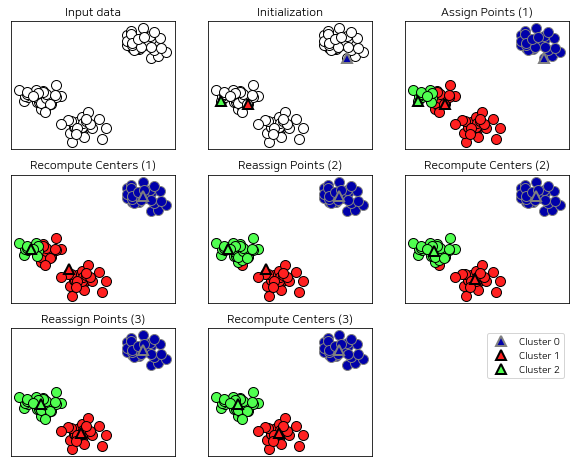

In [51]:
mglearn.plots.plot_kmeans_algorithm()

In [53]:
X, y = make_blobs()

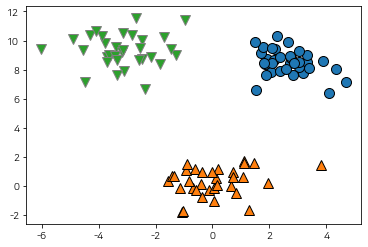

In [54]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [57]:
model = KMeans(n_clusters=3).fit(X)

In [59]:
# 정답 나타내기
model.labels_

array([0, 2, 0, 2, 0, 2, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 1, 1, 2, 1, 1, 0, 0, 1, 2, 1, 2, 2, 2, 2, 0, 2, 2, 1, 1,
       2, 1, 0, 1, 2, 2, 0, 1, 2, 2, 1, 2, 2, 0, 2, 1, 2, 0, 1, 0, 1, 0,
       2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 2, 0, 1, 1,
       2, 0, 2, 1, 2, 0, 1, 1, 2, 0, 0, 2], dtype=int32)

In [60]:
model = KMeans(n_clusters=5).fit(X)
model.labels_

array([1, 2, 1, 2, 1, 2, 1, 1, 2, 3, 3, 2, 2, 1, 2, 1, 1, 2, 1, 2, 0, 3,
       1, 3, 1, 0, 0, 2, 0, 0, 4, 1, 0, 2, 0, 2, 2, 2, 2, 4, 2, 2, 3, 3,
       2, 0, 1, 0, 2, 2, 1, 0, 2, 2, 3, 2, 2, 1, 2, 3, 2, 4, 3, 1, 3, 1,
       2, 1, 1, 2, 3, 1, 0, 3, 1, 4, 3, 4, 1, 3, 0, 0, 4, 0, 2, 1, 0, 0,
       2, 1, 2, 0, 2, 4, 0, 0, 2, 1, 4, 2], dtype=int32)

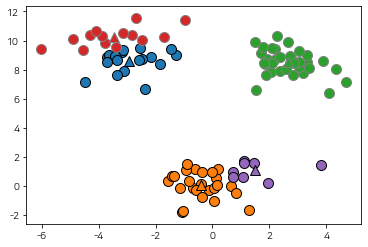

In [62]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers='o')
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1, 2, 3, 4], markers='^')

### sample 1. make_moons

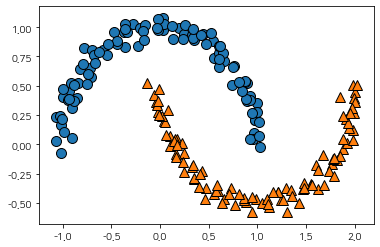

In [63]:
X, y = make_moons(n_samples=200, noise=0.05, random_state=0)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

In [64]:
model = KMeans(n_clusters=2).fit(X)

In [65]:
model.labels_

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0], dtype=int32)

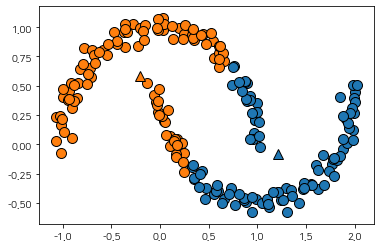

In [66]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], model.labels_, markers='o')
mglearn.discrete_scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], [0, 1], markers='^')

In [67]:
preds = model.predict(X)
accuracy_score(y, preds)

0.245

### sample 2. iris

In [68]:
iris = load_iris()

In [70]:
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.DataFrame(iris.target, columns=['target'])

X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [71]:
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
145,2
146,2
147,2
148,2


Text(0.5, 1.0, '꽃잎')

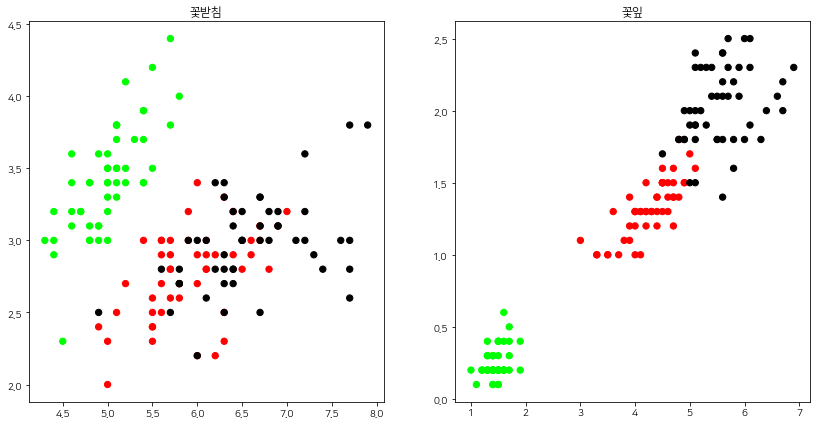

In [73]:
plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1,2,1)
plt.scatter(X['sepal length (cm)'], X['sepal width (cm)'], c=colormap[y.target], s=40)
plt.title("꽃받침")

plt.subplot(1,2,2)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[y.target], s=40)
plt.title("꽃잎")

#1행1열 그래프는 엔트로피가 높다
#1행2열 그래프는 엔트로피가 낮다

In [74]:
model = KMeans(n_clusters=3).fit(X)

model.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [75]:
accuracy_score(y, model.labels_)

0.8933333333333333

Text(0.5, 1.0, '꽃잎')

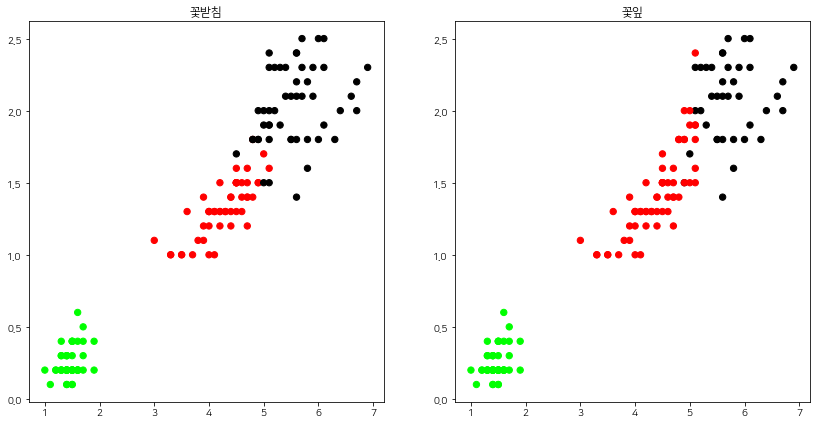

In [78]:
#### 그래프로 실제 분류와 예측값을 비교해보자.

plt.figure(figsize=(14, 7))
colormap = np.array(["lime", "red", "black"])

plt.subplot(1,2,1)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[y.target], s=40)
plt.title("꽃받침")

plt.subplot(1,2,2)
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c=colormap[model.labels_], s=40)
plt.title("꽃잎")


In [79]:
#### 뭐가 틀린걸까?
confusion_matrix(y, model.labels_)

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0, 14, 36]])

### sample 3. 키와 몸무게로 옷 크기 류를 세가지로

In [80]:
df = pd.DataFrame(columns=["height", "weight"])
df.loc[0] = [185, 60]
df.loc[1] = [180, 65]
df.loc[2] = [185, 75]
df.loc[3] = [165, 50]
df.loc[4] = [170, 58]
df.loc[5] = [155, 60]
df.loc[6] = [157, 57]
df.loc[7] = [162, 62]
df.loc[8] = [173, 70]
df.loc[9] = [171, 70]
df

,height,weight
0,185,60
1,180,65
2,185,75
3,165,50
4,170,58
5,155,60
6,157,57
7,162,62
8,173,70
9,171,70


/Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


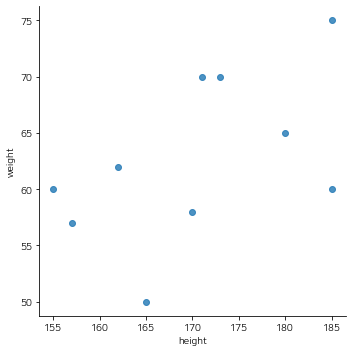

In [85]:
sns.lmplot("height", "weight", data = df, fit_reg=False)

In [91]:
model = KMeans(n_clusters=3).fit(df.values)
model.labels_
df['lables'] = model.labels_
df

,height,weight,lables
0,185,60,2
1,180,65,2
2,185,75,2
3,165,50,0
4,170,58,0
5,155,60,0
6,157,57,0
7,162,62,0
8,173,70,1
9,171,70,1


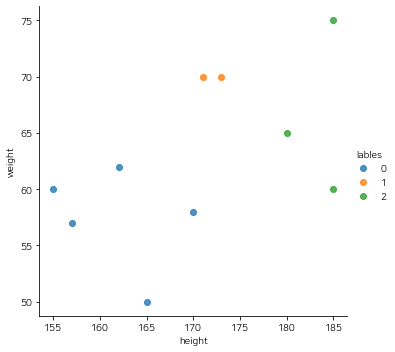

In [93]:
sns.lmplot('height', 'weight', data=df, hue='lables', fit_reg=False)

# 3. 인공신경망(Artficial Neural Network)

- 딥러닝과의 차이점은 사이킷런을 가지고 하는 ..
- 딥러닝에선 Tensorflow
- 사이킷러닝에선 제한적. 이미 완성된 함수로 만들어져 있어 값만 던져주면 끝
- 즉, 기본알고리즘은 똑같지만 라이브러리가 달라 자유도가 완전히 다르다.

In [ ]:
#### 인공신경망을 설명해주는 그림

import os
os.environ['PATH'] += os.pathsep + "Users/hoon/opt/anaconda3/envs/datastudy/lib/python3.9/site-packages/graphviz"

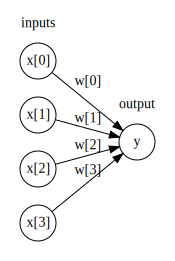

In [4]:
mglearn.plots.plot_logistic_regression_graph()

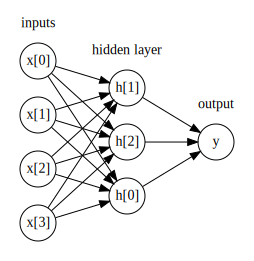

In [5]:
mglearn.plots.plot_single_hidden_layer_graph()

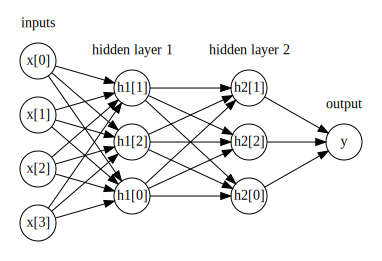

In [6]:
mglearn.plots.plot_two_hidden_layer_graph()

In [7]:
# 입력값과 출력값 구조는 똑같다. 차이는 퍼셉트론, 즉 hidden layer가 존재한다는 것.
# 이 특징이 나중에 딥러닝으로 이어진다.

### (1) 퍼셉트론

+ 다수의 신호를 입력받아 하나의 신호로 출력
+ '가중치와 편차만 구할 수 있으면 스스로 논리적인 판단할 수 있겠구나!'라고 판단

#### 1) AND gate

In [13]:
def AND(x1, x2):
    w1, w2 = 0.5, 0.5
    b = 0.7
    tmp = w1*x1 + w2*x2

    if tmp <= b:
        return 0
    else:
        return 1


input = [(0, 0), (0, 1), (1, 0), (1, 1)]

for x1, x2 in input:
    y = AND(x1, x2)
    print('{}, {} -> {}'.format(x1, x2, y))


#스스로 찾도록 코드를 짜야하지만, 지금은 빠른 이해를 위해 절편도 그냥 입력해준 것
#가중치를 찾게끔 코드를 짜야한다. 'if로 0이면' 이런 식의 코드는 기계가 학습하는 것이 아니라 지정해주는 것이다. 가중치로 0인지 1인지 로지스틱회귀분석으로 판단하게 만들어준다.
#0은 False, 1은 True다. and 논리에서는 둘 다 True가 아니면 다 False가 된다.

0, 0 -> 0
0, 1 -> 0
1, 0 -> 0
1, 1 -> 1


#### 2) OR gate

In [14]:
def OR(x1, x2):
    w1, w2 = 0.5, 0.5
    b = 0.2
    tmp = w1*x1 + w2*x2

    if tmp <= b:
        return 0
    else:
        return 1

input = [(0, 0), (0, 1), (1, 0), (1, 1)]

for x1, x2 in input:
    y = OR(x1, x2)
    print('{}, {} -> {}'.format(x1, x2, y))


0, 0 -> 0
0, 1 -> 1
1, 0 -> 1
1, 1 -> 1


#### XOR gate
- 하나만 참일 때 True값이 나오는 논리
- 0, 0 or 1, 1은 False가 나와야한다.
- 이건 회귀선으로 분류 불가능. 그래서 안된다고

In [27]:
def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b

    if tmp <= 0:
        return 0
    else:
        return 1

input = [(0, 0), (0, 1), (1, 0), (1, 1)]

for x1, x2 in input:
    y = NAND(x1, x2)
    print('{}, {} -> {}'.format(x1, x2, y))

0, 0 -> 1
0, 1 -> 1
1, 0 -> 1
1, 1 -> 0


In [28]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)

    return y

input = [(0, 0), (0, 1), (1, 0), (1, 1)]

for x1, x2 in input:
    y = XOR(x1, x2)
    print('{}, {} -> {}'.format(x1, x2, y))

0, 0 -> 0
0, 1 -> 1
1, 0 -> 1
1, 1 -> 0


### (2) 인공신경망을 구현하는 방법

+ sklearn : Perceptron(), MLPClassifier()
+ 주로 사용하는건 MLPClassifier()
+ sklearn에선 이미 만들어져있는 객체만 사용 가능. 내가 생각하고 있는 모델을 만들 수 없음.
+ 그래서 자유롭게 실험하고 시뮬레이션, 모델 생성이 가능하도록 프레임워크 만듬
    - ML, DL 프레임워크 : '텐서플로우(Tensorflow)' // '파이토치(Pytorch)' // 이 외(Keras, Theano ... )

In [33]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.3)

In [34]:
sc = StandardScaler()
sc.fit(X_train)

X_train = sc.transform(X_train)
X_test = sc.transform(X_test)

In [35]:
model = Perceptron(max_iter=40, eta0=0.1, random_state=0)
model.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=40)

In [36]:
preds = model.predict(X_test)
print("정확도 : ", accuracy_score(y_test, preds))

정확도 :  0.8222222222222222


#### 2) MLP Classifier

In [37]:
model2 = MLPClassifier(max_iter=500, hidden_layer_sizes=(200, 200, 200))
model2.fit(X_train, y_train)

preds = model2.predict(X_test)
print("정확도 : ", accuracy_score(y_test, preds))

정확도 :  0.9555555555555556


### 4. Kaggle Challenge

+ 타이타닉 샘플을 이용한 분류 알고리즘 성능 비교
+ kaggle 제출용
+ https://www.kaggle.com/c/titanic/

In [82]:
train = pd.read_csv("data/titanic/train.csv")
test = pd.read_csv("data/titanic/test.csv")

In [83]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [84]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### 1) EDA

In [85]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [86]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [87]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [88]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [89]:
def bar_chart(feature):
    survived = train[train["Survived"]==1][feature].value_counts()
    dead = train[train["Survived"]==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ["Survived", "Dead"]
    df.plot(kind="bar", stacked=True, figsize=(10, 5))

In [90]:
bar_chart()

TypeError: bar_chart() missing 1 required positional argument: 'feature'

### 2) Feature Engineering

In [91]:
train_test_data = [train, test]

for dataset in train_test_data:
    dataset["Title"] = dataset["Name"].str.extract(" ([A-Za-z]+)\.")

print(train["Title"].value_counts())
print(test["Title"].value_counts())

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64
Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64


In [92]:
title_mapping = {"Mr":0, "Miss":1, "Mrs":2, "Master":3, "Dr":3, "Rev":3, "Col":3, "Mlle":3, "Major":3,
                 "Capt":3, "Mme":3, "Lady":3, "Countess":3, "Don":3, "Jonkheer":3, "Sir":3, "Ms":3,
                "Dona":3}

for dataset in train_test_data:
    dataset["Title"] = dataset["Title"].map(title_mapping)

In [93]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [94]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


In [95]:
train.drop("Name", axis=1, inplace=True)
test.drop("Name", axis=1, inplace=True)

In [96]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title        891 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 83.7+ KB


In [97]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   SibSp        418 non-null    int64  
 5   Parch        418 non-null    int64  
 6   Ticket       418 non-null    object 
 7   Fare         417 non-null    float64
 8   Cabin        91 non-null     object 
 9   Embarked     418 non-null    object 
 10  Title        418 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 36.0+ KB


#### 2) Age의 Binning

In [98]:
print(train.isnull().sum())
print(test.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Title            0
dtype: int64
PassengerId      0
Pclass           0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
Title            0
dtype: int64


In [99]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [100]:
for dataset in train_test_data:
    dataset.loc[dataset["Age"]<16, "Age"] = 0
    dataset.loc[(dataset["Age"]>=16) & (dataset["Age"]<26), "Age"] = 1
    dataset.loc[(dataset["Age"]>=26) & (dataset["Age"]<36), "Age"] = 2
    dataset.loc[(dataset["Age"]>=36) & (dataset["Age"]<62), "Age"] = 3
    dataset.loc[dataset["Age"]>=62, "Age"] = 4

In [101]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,0


In [102]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,2.0,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,3.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,4.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,2.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,S,2


#### 3. Embarked의 결측치 처리와 인코딩

In [103]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [104]:
train['Embarked'].fillna("S", inplace=True)

In [105]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map({'S':0, 'C':1, 'Q':2})

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,0,0


#### 4) Fare의 결측치와 Binning

In [106]:
# 요금은 객실등급과 관련이 깊다. 등급별 중앙값을 채워주자
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [107]:
for dataset in train_test_data:
    dataset.loc[dataset["Fare"] <= 17, "Fare"] = 0
    dataset.loc[(dataset["Fare"] > 17) & (dataset["Fare"] <= 30), "Fare"] = 1
    dataset.loc[(dataset["Fare"] > 30) & (dataset["Fare"] <= 100), "Fare"] = 2
    dataset.loc[dataset["Fare"] > 100, "Fare"] = 3

#### 5) Cabin 처리
- 결측치 가장 많아

In [108]:
train['Cabin'].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [109]:
# 알파벳만 쓰자. 숫자까지 하면 너무 복잡해

for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].str[:1]

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,NaN,0,0
1,2,1,1,female,3.0,1,0,PC 17599,2.0,C,1,2
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,0.0,NaN,0,1
3,4,1,1,female,2.0,1,0,113803,2.0,C,0,2
4,5,0,3,male,2.0,0,0,373450,0.0,NaN,0,0


In [110]:
cabin_mapping = {"A":0, "B":0.4, "C":0.8, "D":1.2, "E":1.6, "F":2, "G":2.4, "T":2.8}

for dataset in train_test_data:
    dataset["Cabin"] = dataset["Cabin"].map(cabin_mapping)

In [111]:
train['Cabin'].value_counts()

0.8    59
0.4    47
1.2    33
1.6    32
0.0    15
2.0    13
2.4     4
2.8     1
Name: Cabin, dtype: int64

In [112]:
#결측치 제거
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

In [113]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,1.0,1,0,A/5 21171,0.0,2.0,0,0
1,2,1,1,female,3.0,1,0,PC 17599,2.0,0.8,1,2
2,3,1,3,female,2.0,0,0,STON/O2. 3101282,0.0,2.0,0,1
3,4,1,1,female,2.0,1,0,113803,2.0,0.8,0,2
4,5,0,3,male,2.0,0,0,373450,0.0,2.0,0,0


#### 5) 성별 인코딩

In [114]:
for dataset in train_test_data:
    dataset["Sex"] = dataset["Sex"].map({"male":0, "female":1})

#### 6) 동승자 컬럼 합치기

In [115]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

#### 7) 필요없는 칼럼 삭제

In [116]:
feature_drop = ["Ticket", "SibSp", "Parch"]

train = train.drop(feature_drop, axis=1)
test = test.drop(feature_drop, axis=1)

train = train.drop(["PassengerId"], axis=1)

In [117]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,0,1.0,0.0,2.0,0,0,2
1,1,1,1,3.0,2.0,0.8,1,2,2
2,1,3,1,2.0,0.0,2.0,0,1,1
3,1,1,1,2.0,2.0,0.8,0,2,2
4,0,3,0,2.0,0.0,2.0,0,0,1


In [118]:
X = train.drop("Survived", axis=1)
y = train["Survived"]

In [119]:
print(X.shape, y.shape)

(891, 8) (891,)


### 4. Modeling

In [121]:
from sklearn.model_selection import KFold

kfold = KFold(n_splits=10, shuffle=True, random_state=0)

In [123]:
#### KNN

knnclf = KNeighborsClassifier(n_neighbors=26)
scores = cross_val_score(knnclf, X, y, cv=kfold, scoring="accuracy")
print(scores)
round(np.mean(scores)*100, 2)

[0.82222222 0.80898876 0.83146067 0.80898876 0.85393258 0.84269663
 0.82022472 0.78651685 0.83146067 0.84269663]


82.49

In [125]:
#### Decision Tree

dtclf = DecisionTreeClassifier()
scores = cross_val_score(dtclf, X, y, cv=kfold, scoring="accuracy")
print(scores)
round(np.mean(scores)*100, 2)

[0.78888889 0.88764045 0.75280899 0.78651685 0.86516854 0.78651685
 0.80898876 0.79775281 0.75280899 0.80898876]


80.36

In [126]:
#### RandomForest
rfclf = RandomForestClassifier(n_estimators=300)
scores = cross_val_score(rfclf, X, y, cv=kfold, scoring="accuracy")
print(scores)
round(np.mean(scores)*100, 2)

[0.82222222 0.87640449 0.76404494 0.82022472 0.88764045 0.84269663
 0.82022472 0.80898876 0.7752809  0.83146067]


82.49

In [127]:
#### NaiveBayes
nbclf = BernoulliNB()
scores = cross_val_score(nbclf, X, y, cv=kfold, scoring="accuracy")
print(scores)
round(np.mean(scores)*100, 2)

[0.77777778 0.76404494 0.82022472 0.76404494 0.7752809  0.78651685
 0.75280899 0.7752809  0.80898876 0.83146067]


78.56

In [128]:
#### MLP
mlpclf = MLPClassifier(hidden_layer_sizes=(200, 200, 200, 200, 200))
scores = cross_val_score(mlpclf, X, y, cv=kfold, scoring="accuracy")
print(scores)
round(np.mean(scores)*100, 2)

[0.72222222 0.79775281 0.79775281 0.80898876 0.85393258 0.83146067
 0.83146067 0.80898876 0.76404494 0.78651685]


80.03

In [129]:
#### SVM
svmclf = SVC()
scores = cross_val_score(svmclf, X, y, cv=kfold, scoring="accuracy")
print(scores)
round(np.mean(scores)*100, 2)

[0.83333333 0.78651685 0.82022472 0.82022472 0.84269663 0.80898876
 0.82022472 0.84269663 0.83146067 0.85393258]


82.6

### 5. test

In [130]:
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,892,3,0,2.0,0.0,2.0,2,0,1
1,893,3,1,3.0,0.0,2.0,0,2,2
2,894,2,0,4.0,0.0,2.0,2,0,1
3,895,3,0,2.0,0.0,2.0,0,0,1
4,896,3,1,1.0,0.0,2.0,0,2,3


In [131]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
Fare           0
Cabin          0
Embarked       0
Title          0
FamilySize     0
dtype: int64

In [132]:
model = SVC()
model.fit(X, y)

SVC()

In [134]:
test_data = test.drop("PassengerId", axis=1).copy()
test_data

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,3,0,2.0,0.0,2.0,2,0,1
1,3,1,3.0,0.0,2.0,0,2,2
2,2,0,4.0,0.0,2.0,2,0,1
3,3,0,2.0,0.0,2.0,0,0,1
4,3,1,1.0,0.0,2.0,0,2,3
...,...,...,...,...,...,...,...,...
413,3,0,2.0,0.0,2.0,0,0,1
414,1,1,3.0,3.0,0.8,1,3,1
415,3,0,3.0,0.0,2.0,0,0,1
416,3,0,2.0,0.0,2.0,0,0,1


In [135]:
preds = model.predict(test_data)

In [136]:
submission = pd.DataFrame({'PassengerId' : test['PassengerId'], 'Survived' : preds})
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [137]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [138]:
submission.to_csv("data/titanic/submission.csv", index=False)